------|加载数据集|------

------|对训练数据进行缩放/归一化处理|------
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]

------|创建并拟合回归模型|------
SGDRegressor()
number of iterations completed: 139, number of weight updates: 13762.0

------|查看参数|------
model parameters:                   w: [110.29 -21.12 -32.54 -38.01], b:[363.14]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16

------|进行预测|------
prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.16 485.93 389.58 492.1 ]
Target values 
[300.  509.8 394.  540. ]

------|绘制结果|------


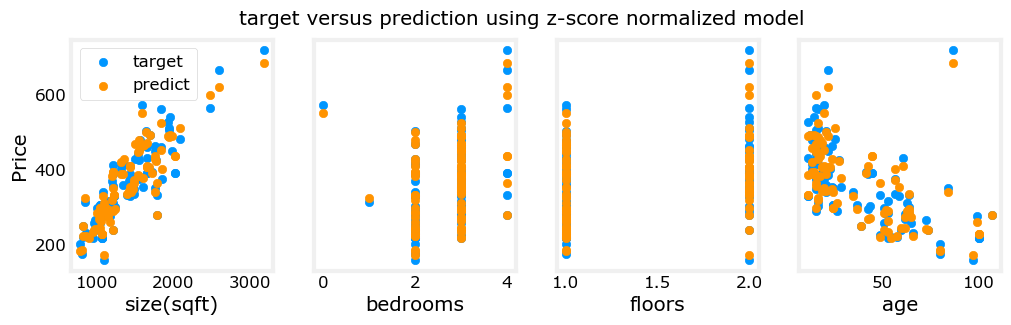

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

print("------|加载数据集|------")
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

print("\n------|对训练数据进行缩放/归一化处理|------")
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

print("\n------|创建并拟合回归模型|------")
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

print("\n------|查看参数|------")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

print("\n------|进行预测|------")
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

print("\n------|绘制结果|------")
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()